In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from scipy.linalg import block_diag
from math import pi

# Apprentissage supervisé TP2 : Echo state networks

# README !

L'implémentation ainsi que toutes les fonctions outils se trouvent dans les deux dernières cellules afin de ne pas entraver la lecture, merci de les éxecuter en priorité.

### Chargement des données

In [4]:
#Chargement des indices
HSI50 = scipy.io.loadmat('logreturn_HSI50_2011_2013.mat')['Y']
NYSE148 = scipy.io.loadmat('logreturn_NYSE148_20102013.mat')['Y']
SP100 = scipy.io.loadmat('logreturn_SP100_2011_2013.mat')['Y']
SP500 = scipy.io.loadmat('logreturn_SP500_2010_2013.mat')['Y']

In [5]:
# On utilisera la convention suivante pour extraire les indices :

# si un seul indice 
data = np.array([HSI50[0]])

#si plusieurs indices, ici on extrait les 3 premiers indices de HSI50 par exemple
data = np.array(HSI50[0:3])

## Toy models

### Signal créneau

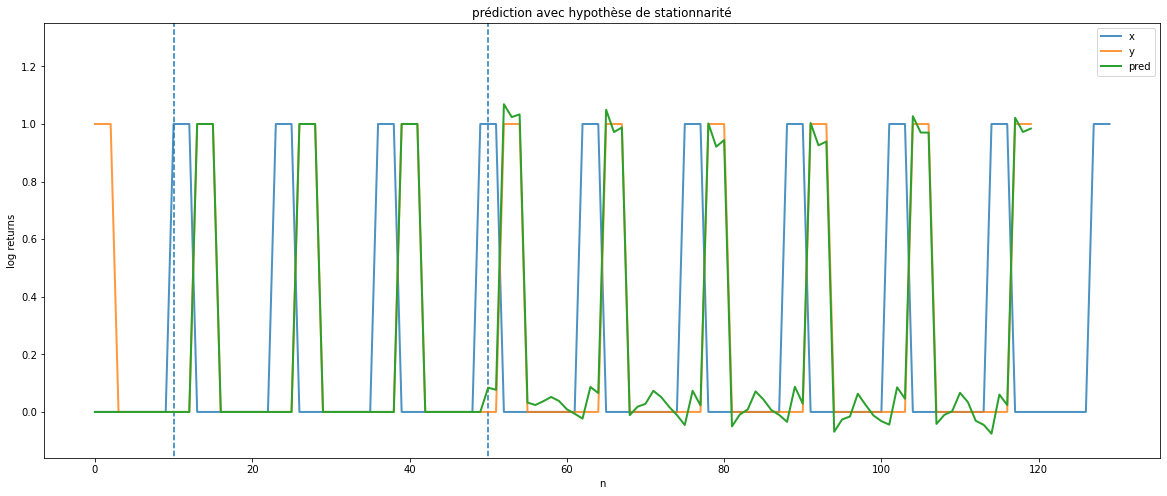

erreur MASE :  0.24105707366669885
erreur RMSE :  0.04555482346204683


In [128]:
shift = 10
data_l = np.array([[0,0,0,0,0,0,0,0,0,0,1,1,1]*10])
data_ls = shift_array(data_l, shift)
plt.show()
nflush = 10
ntrain = 40

esn = ESN(N=1000, shift=shift, gamma=1e-6, r=1.01, mode='s', seed=0)
y_est = esn.fit_pred(data_l, data_ls, nflush=nflush, ntrain=ntrain)

super_plot(data_l, data_ls, y_est, nflush, ntrain, custom_title="prédiction avec hypothèse de stationnarité")

print("erreur MASE : ", MASE(data_ls, y_est, nflush+ntrain))
print("erreur RMSE : ", RMSE(data_ls, y_est, nflush+ntrain))

### Signal sinusoïdal

In [11]:
n = 1000
shift = 0
f = lambda l: np.cos(16*l)*np.sin(10*l+pi/2)
x = np.array([f(np.linspace(0, 1, n))])
y = np.array([f(np.linspace(0, 1, n) + 0.05)])

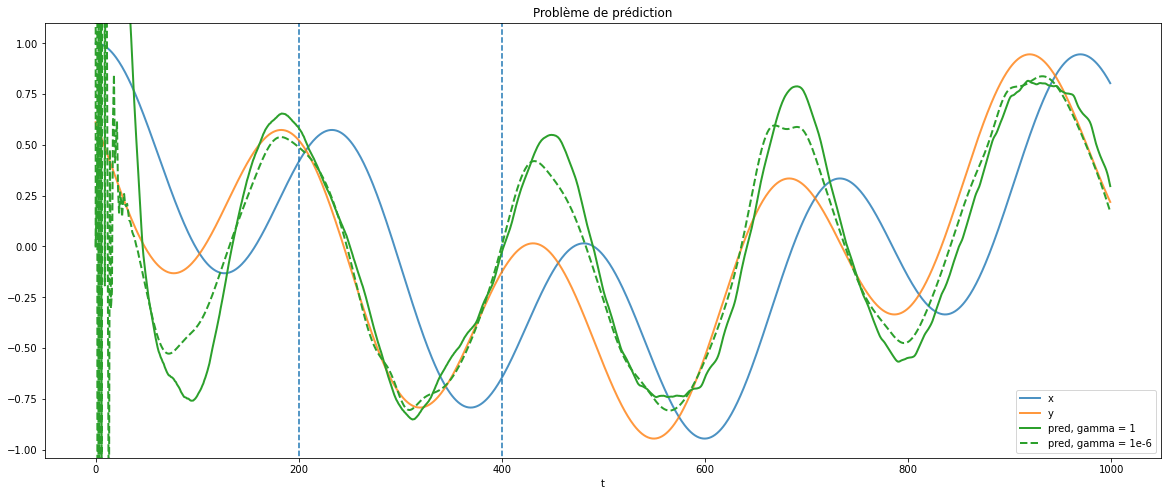

In [12]:
nflush = 200
ntrain = 200

esn = ESN(N=1000, shift=shift, gamma=1, r=1.01, mode='s', seed=0)
y_est = esn.fit_pred(x, y, nflush=nflush, ntrain=ntrain)
esn = ESN(N=10, shift=shift, gamma=1e-6, r=1.01, mode='s', seed=0)
y_est2 = esn.fit_pred(x, y, nflush=nflush, ntrain=ntrain)

plt.figure(figsize=(20,8))
plt.plot(x[0], label="x" , linewidth=2, c='tab:blue', alpha = 0.8)
plt.plot(y[0], label="y" , linewidth=2, c='tab:orange', alpha = 0.8)
plt.plot(y_est[0], label="pred, gamma = 1",  linewidth=2, c='tab:green')
plt.plot(y_est2[0], label="pred, gamma = 1e-6", ls='dashed',  linewidth=2, c='tab:green')

b, t = plt.ylim()
plt.vlines(nflush, b, t, ls='dashed')
plt.vlines(nflush+ntrain, b, t, ls='dashed')
plt.ylim(top=1.1*max([max(l) for l in x]))
plt.ylim(bottom=1.1*min([min(l) for l in x]))
plt.title("Problème de prédiction")
plt.xlabel("t")
plt.legend()
plt.show()


## Apprentissage sous hypothèse stationnaire

In [84]:
data = np.array([HSI50[0]])

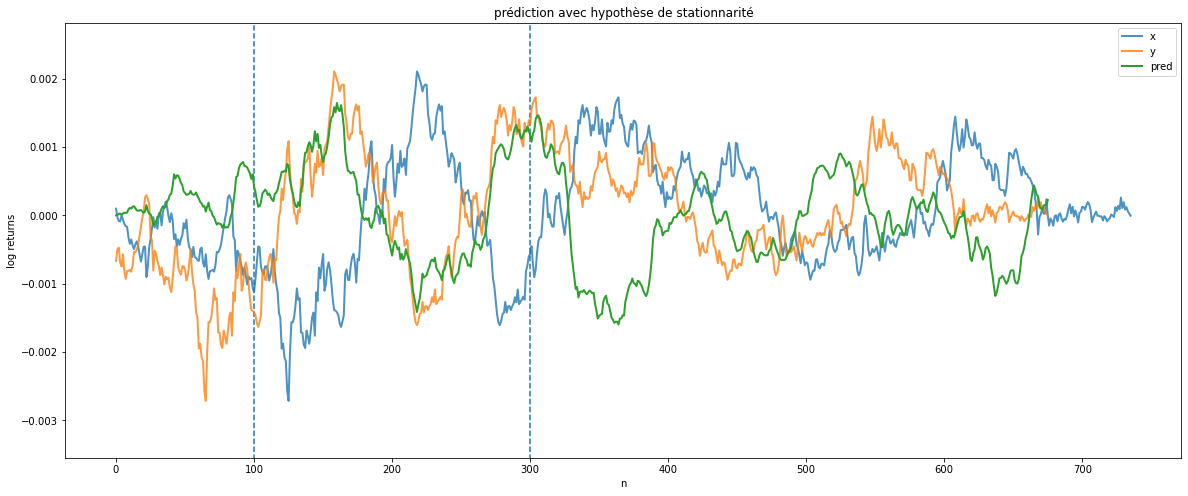

erreur MASE :  7.739471167828525
erreur RMSE :  0.000931707951444307


In [85]:
shift = 60
L = 60
data_l = moyenne_mobile(data, L)
data_ls = shift_array(data_l, shift)
plt.show()
nflush = 100
ntrain = 200

esn = ESN(N=1000, shift=shift, gamma=1e-6, r=1.00, mode='s', seed=0)
y_est = esn.fit_pred(data_l, data_ls, nflush=nflush, ntrain=ntrain)

super_plot(data_l, data_ls, y_est, nflush, ntrain, custom_title="prédiction avec hypothèse de stationnarité")

print("erreur MASE : ", MASE(data_ls, y_est, nflush+ntrain))
print("erreur RMSE : ", RMSE(data_ls, y_est, nflush+ntrain))

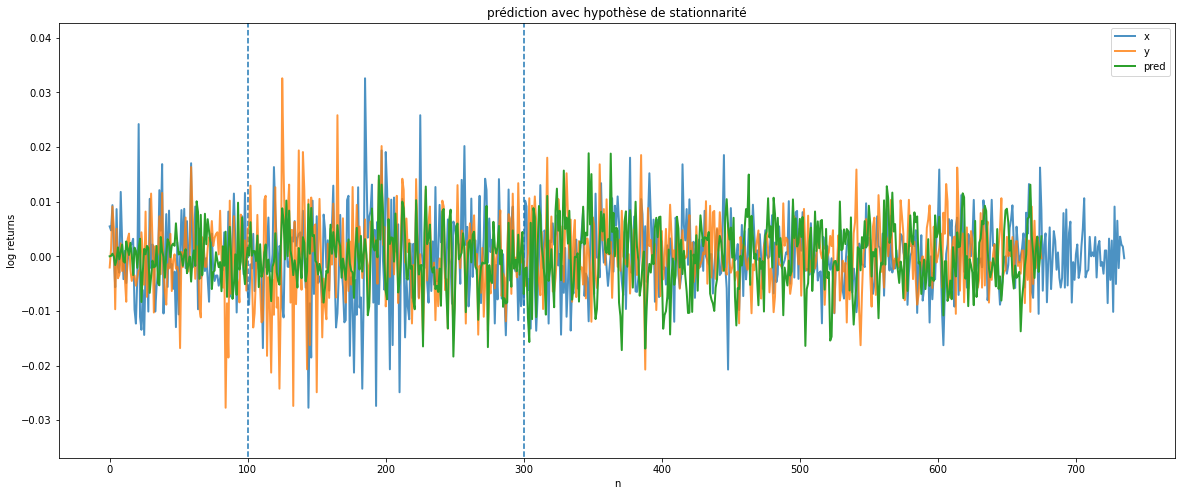

erreur MASE :  1.153266932438755
erreur RMSE :  0.008768187387858372


In [86]:
shift = 60
L = 1
data_l = moyenne_mobile(data, L)
data_ls = shift_array(data_l, shift)
plt.show()
nflush = 100
ntrain = 200

esn = ESN(N=1000, shift=shift, gamma=1e-6, r=1.00, mode='s', seed=0)
y_est = esn.fit_pred(data_l, data_ls, nflush=nflush, ntrain=ntrain)

super_plot(data_l, data_ls, y_est, nflush, ntrain, custom_title="prédiction avec hypothèse de stationnarité")

print("erreur MASE : ", MASE(data_ls, y_est, nflush+ntrain))
print("erreur RMSE : ", RMSE(data_ls, y_est, nflush+ntrain))

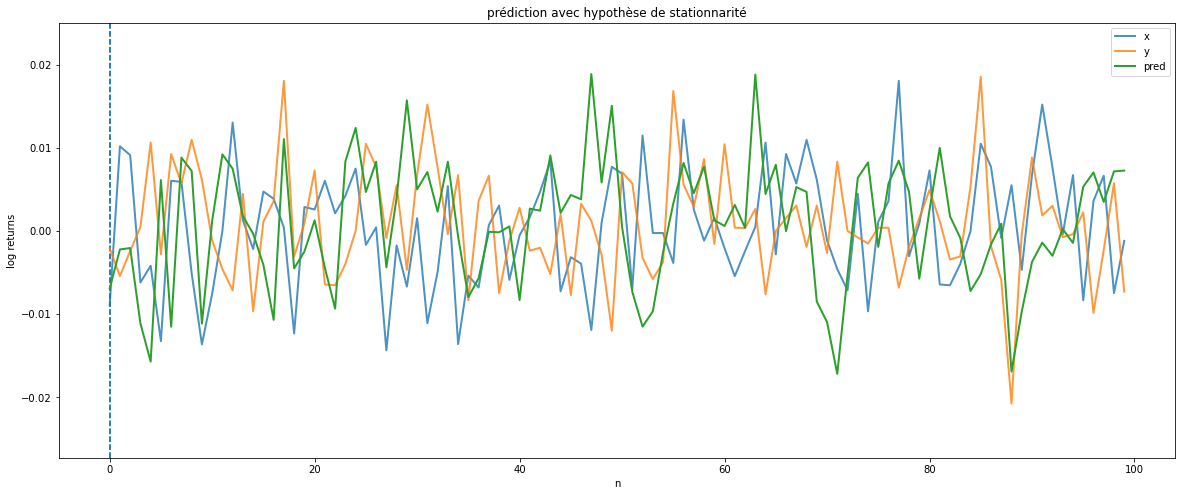

In [87]:
super_plot(data_l[:, 300:400], data_ls[:, 300:400], y_est[:, 300:400], 0, 0, custom_title="prédiction avec hypothèse de stationnarité")

Le modèle restitue les fréquence qu'il a apprise lors de la phase d'entrapinement, ile ne généralise pas. De plus il diverge à cause du $r > 1$. Il est important de garder à l'esprit que le lissage s'étend sur $60$ jours. On s'attend donc à ce que la méthode stationnaire soit encore moins bonne en réduisant $L$.

In [ ]:
nflush = 100
ntrain = 200

error = []
for seed in range(5):
    print("ouf")
    print(error)
    tmp2 = []
    for shift in [0, 10, 20, 30, 40, 50, 60, 70, 80]:
        tmp = []
        for L in [1, 10, 20, 30, 40, 50, 60, 70, 80]:
            data_l = moyenne_mobile(data, L)
            data_ls = shift_array(data_l, shift)
            esn = ESN(N=1000, shift=shift, gamma=1e-6, r=1.00, mode='s', seed=seed)
            y_est = esn.fit_pred(data_l, data_ls, nflush=nflush, ntrain=ntrain)
            tmp.append(MASE(data_ls, y_est, nflush+ntrain))
        tmp2.append(tmp)
    error.append(tmp2)

In [74]:
res_mean = np.mean(error, axis=0)

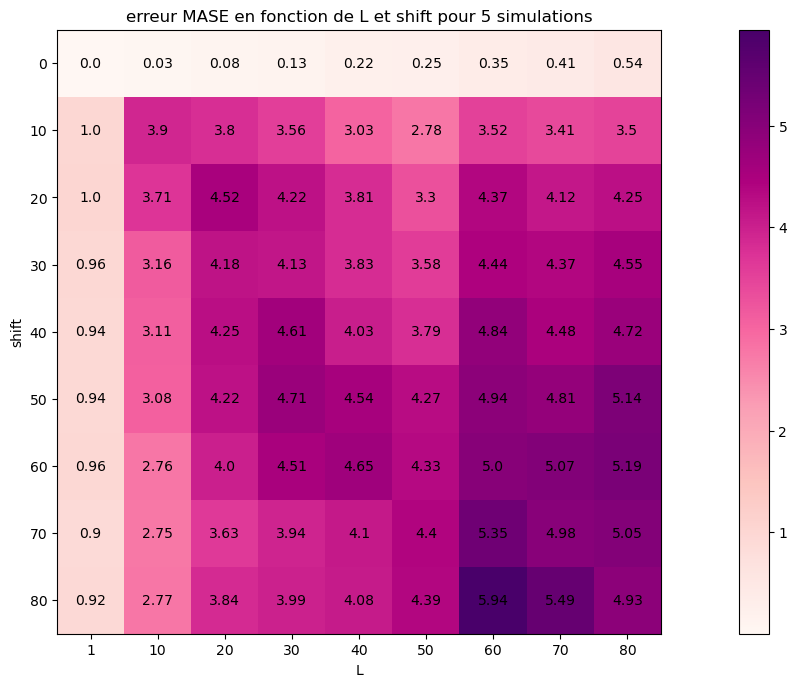

In [80]:
shift_tab = [0, 10, 20, 30, 40, 50, 60, 70, 80]
L_tab = [1, 10, 20, 30, 40, 50, 60, 70, 80]
fig, ax = plt.subplots(figsize=(20,8), dpi= 100)
im = ax.imshow(res_mean, cmap="RdPu")
ax.set_xticks(np.arange(len(L_tab)))
ax.set_yticks(np.arange(len(shift_tab)))
ax.set_xticklabels(L_tab)
ax.set_yticklabels(shift_tab)

for i in range(len(shift_tab)):
    for j in range(len(L_tab)):
        text = ax.text(j, i, "{}".format(round(res_mean[i][j], 2)),
                       ha="center", va="center", color="black")
        
plt.xlabel('L')
plt.ylabel('shift')
plt.title("erreur MASE en fonction de L et shift pour 5 simulations")
fig.colorbar(im)

L'erreur est bien plus importante. Si nous voulons réduire $L$ (ce qui permettra de s'approcher d'une prédiction journalière) il est nécessaire d'améliorer notre algorithme

## Apprentissage par fenêtre glissante

### Première approche

Reprenons les mêmes paramètres que précédemment ainsi que la même seed afin d'avoir une initialisation équivalente

In [330]:
data = np.array([HSI50[0]])

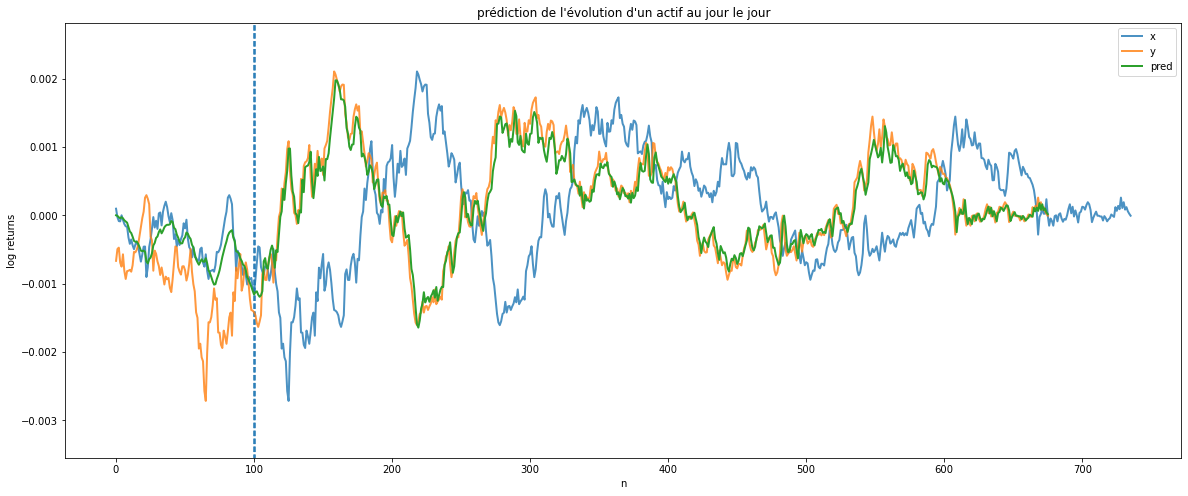

erreur RMSE :  0.00018120255267734396


In [331]:
shift = 60
L = 60
data_l = moyenne_mobile(data, L)
data_ls = shift_array(data_l, shift)
nflush = 100
ntrain = 1
esn = ESN(N=100, shift=shift, gamma=1e-6, r=1.00, mode='d', seed=1)
y_est = esn.fit_pred(data_l, data_ls, nflush=nflush, ntrain=ntrain)

super_plot(data_l, data_ls, y_est, nflush, ntrain)

print("erreur RMSE : ", RMSE(data_ls, y_est, nflush+ntrain))

On ne gagne pas en précision avec des paramètres, essayons de trouver les paramètres optimaux pour l'apprentissage par fenêtre glissante

### Paramètres optimaux

Etudions d'abord l'effet de $N$ sur la prédiction. Nous effectuerons $5$ simulations (changement de seed) afin de moyenner les initialisation aléatoires.

In [317]:
shift = 60
L = 60
data_l = moyenne_mobile(data, L)
data_ls = shift_array(data_l, shift)
nflush = 100
ntrain = 200
N_tab = [500*k for k in range(1, 11)]
res = []
for seed in range(5):
    tmp = []
    for N in N_tab:
        esn = ESN(N=N, shift=shift, gamma=1e-6, r=1.00, mode='d', seed=seed)
        y_est = esn.fit_pred(data_l, data_ls, nflush=nflush, ntrain=ntrain)
        tmp.append(RMSE(data_ls, y_est, nflush+ntrain))
    res.append(tmp)

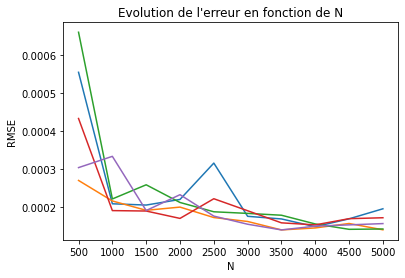

In [327]:
for r in res:
    plt.plot(r)

plt.xticks(np.arange(len(N_tab)), N_tab)
plt.xlabel("N")
plt.ylabel("RMSE")
plt.title("Evolution de l'erreur en fonction de N")
plt.show()


On constate qu'il est nécessaire d'utiliser un nombre de neuronnes de l'ordre du millier. Par la suite nous prendrons $N = 4000$. 

Etudions maintenant l'impact de $\gamma$ et $r$. Pour cela nous feront varier les 2 paramètres simultanément pour $N = 3000$.
A cause du temps de calcul nous n'effectuerons que deux simulations.

In [70]:
shift = 60
L = 60
data_l = moyenne_mobile(data, L)
data_ls = shift_array(data_l, shift)
nflush = 100
ntrain = 100
gamma_tab = [5e-5, 1e-5, 5e-6, 1e-6, 5e-7, 1e-7, 5e-8, 1e-8, 5e-9]
r_tab = [0.99, 0.995, 1, 1.005, 1.01, 1.015, 1.02, 1.025, 1.03]
res = []

"""
Code très long à éxecuter

for seed in range(10):
    tmp2 = []
    for gamma in gamma_tab:
        tmp1 = []
        for r in r_tab:
            esn = ESN(N=4000, shift=shift, gamma=gamma, r=r, mode='d', seed=seed)
            y_est = esn.fit_pred(data_l, data_ls, nflush=nflush, ntrain=ntrain)
            tmp1.append(RMSE(data_ls, y_est, nflush+ntrain))
        tmp2.append(tmp1)
    res.append(tmp2)
"""

"\nfor seed in range(1):\n    tmp2 = []\n    for gamma in gamma_tab:\n        tmp1 = []\n        for r in r_tab:\n            esn = ESN(N=4000, shift=shift, gamma=gamma, r=r, mode='d', seed=seed)\n            y_est = esn.fit_pred(data_l, data_ls, nflush=nflush, ntrain=ntrain)\n            tmp1.append(RMSE(data_ls, y_est, nflush+ntrain))\n        tmp2.append(tmp1)\n    res.append(tmp2)\n"

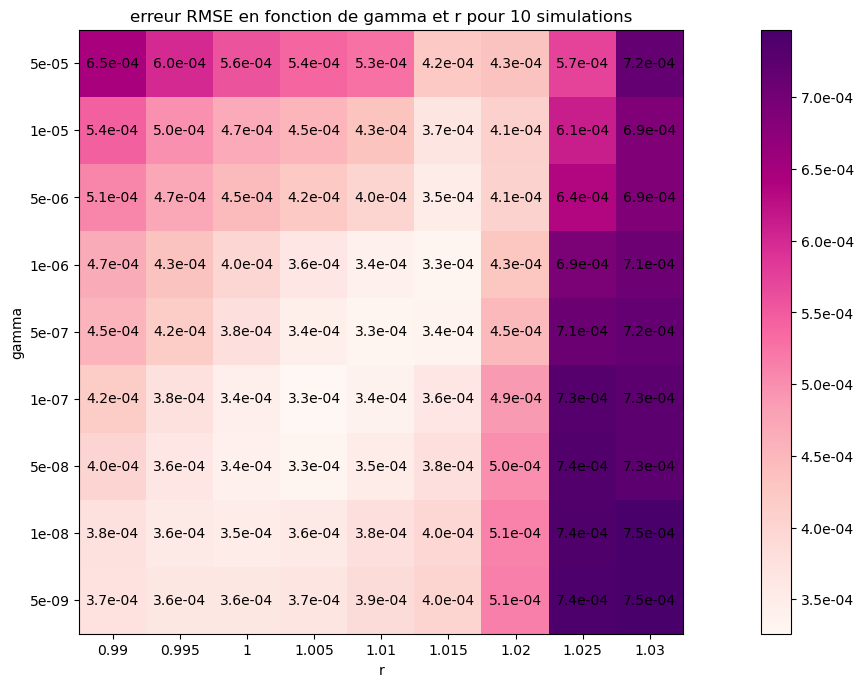

In [74]:

fig, ax = plt.subplots(figsize=(20,8), dpi= 100)
im = ax.imshow(res_mean, cmap="RdPu")
ax.set_xticks(np.arange(len(r_tab)))
ax.set_yticks(np.arange(len(gamma_tab)))
ax.set_xticklabels(r_tab)
ax.set_yticklabels(gamma_tab)

for i in range(len(gamma_tab)):
    for j in range(len(r_tab)):
        text = ax.text(j, i, "{:.1e}".format(res_mean[i][j]),
                       ha="center", va="center", color="black")
        
plt.xlabel('r')
plt.ylabel('gamma')
plt.title("erreur RMSE en fonction de gamma et r pour 10 simulations")
fig.colorbar(im, format="%.1e")

Maintenant que nous avons nos paramètres $N$, $\gamma$, et $r$ déterminons l'impact de $ntrain$ sur la prédiction

### Résultat optimisé avec les paramètres determinés précedemment

In [21]:
data = np.array([HSI50[0]])

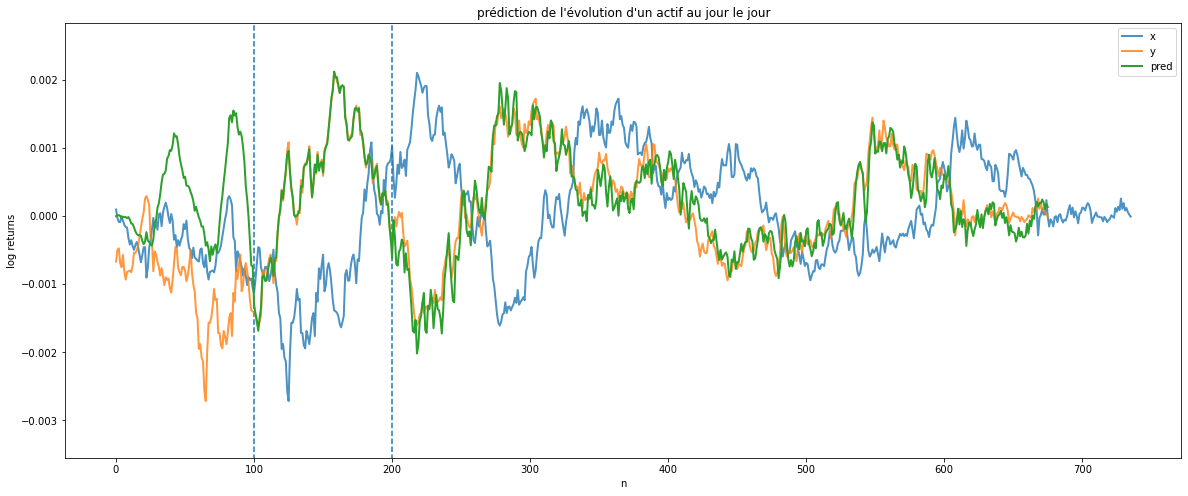

erreur RMSE :  0.00022875140647506085


In [98]:
shift = 60
L = 60
data_l = moyenne_mobile(data, L)
data_ls = shift_array(data_l, shift)
nflush = 100
ntrain = 100
esn = ESN(N=4000, shift=shift, gamma=1e-7, r=1.01, mode='d', seed=0)
y_est = esn.fit_pred(data_l, data_ls, nflush=nflush, ntrain=ntrain)

super_plot(data_l, data_ls, y_est, nflush, ntrain)

print("erreur RMSE : ", RMSE(data_ls, y_est, nflush+ntrain))

### Généralisation multi actifs

In [100]:
#Dans le cas multi actif on utilisa la syntaxe suivante pour charger les actifs (ici les 2 premiers de HSI50)
data = np.array(HSI50[0:2])

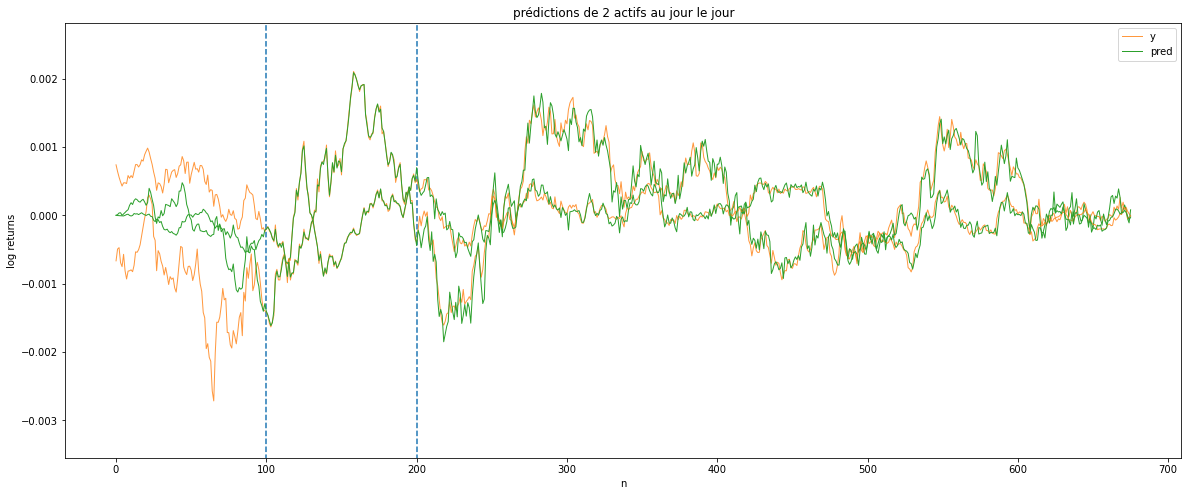

erreur RMSE :  0.00013811950104449997


In [101]:
shift = 60
L = 60
data_l = moyenne_mobile(data, L)
data_ls = shift_array(data_l, shift)
nflush = 100
ntrain = 100
esn = ESN(N=4000, shift=shift, gamma=1e-7, r=1.01, mode='d', seed=0)
y_est = esn.fit_pred(data_l, data_ls, nflush=nflush, ntrain=ntrain)

super_plot(data_l, data_ls, y_est, nflush, ntrain)

print("erreur RMSE : ", RMSE(data_ls, y_est, nflush+ntrain))

In [102]:
data = np.array(HSI50[0:10])

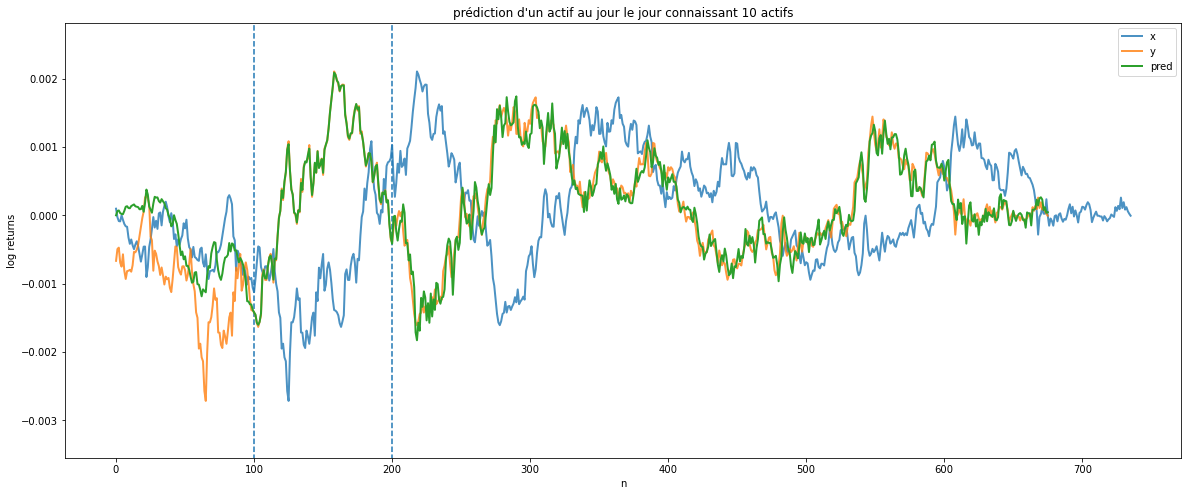

erreur RMSE :  0.00016644447981347684


In [103]:
shift = 60
L = 60
data_l = moyenne_mobile(data, L)
data_ls = shift_array(data_l, shift)
nflush = 100
ntrain = 100
esn = ESN(N=4000, shift=shift, gamma=1e-7, r=1.01, mode='d', seed=0)
y_est = esn.fit_pred(data_l, data_ls, nflush=nflush, ntrain=ntrain)

super_plot(data_l, data_ls, y_est, nflush, ntrain, idx_to_plot=0)

print("erreur RMSE : ", RMSE(data_ls, y_est, nflush+ntrain, idx_error=0))

## Optimisations de l'ESN

### Tests de l'ajout de sparsité

In [110]:
data = np.array(SP500[0:10])

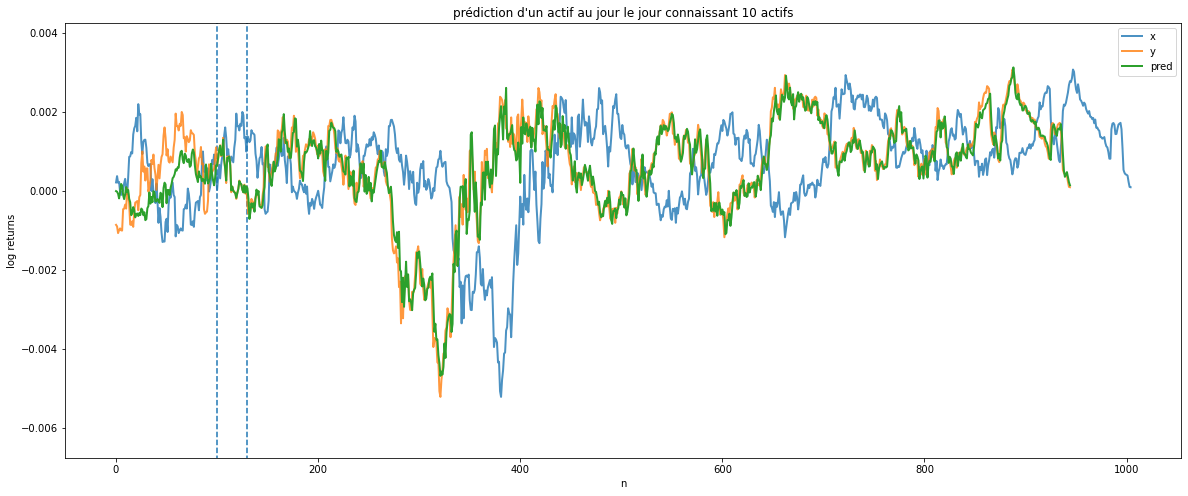

erreur RMSE :  0.0003240303095254067
erreur MASE :  1.1244360731436074


In [111]:
shift = 60
L = 60
data_l = moyenne_mobile(data, L)
data_ls = shift_array(data_l, shift)
nflush = 100
ntrain = 30

esn = ESN(N=4000, shift=shift, gamma=1e-7, r=1.01, mode='d', seed=0, sparse=0.1)
y_est = esn.fit_pred(data_l, data_ls, nflush=nflush, ntrain=ntrain)

super_plot(data_l, data_ls, y_est, nflush, ntrain, idx_to_plot=0)

print("erreur RMSE : ", RMSE(data_ls, y_est, nflush+ntrain, idx_error=0))
print("erreur MASE : ", MASE(data_ls, y_est, nflush+ntrain, idx_error=0))

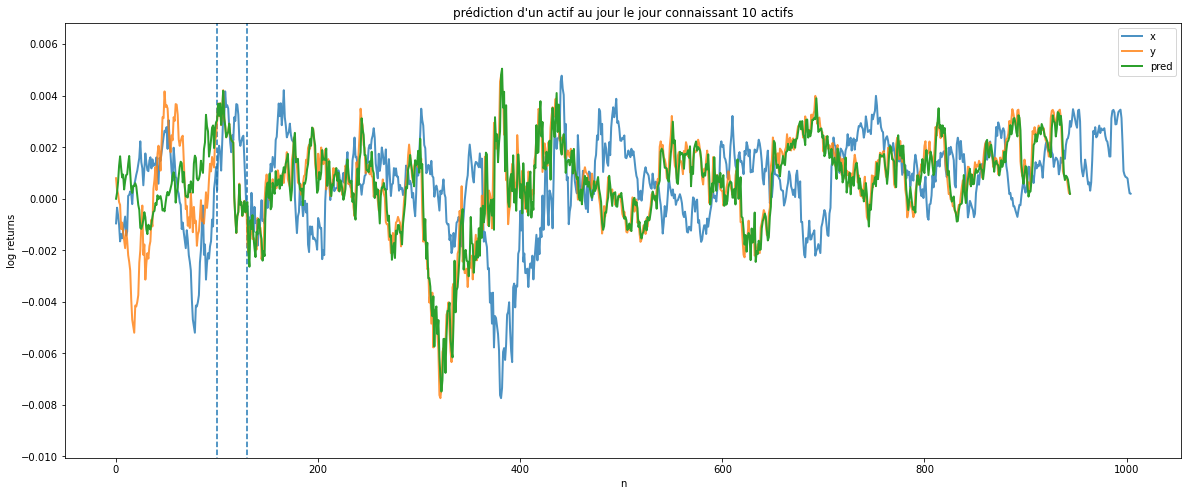

erreur RMSE :  0.0006435809508304232
erreur MASE :  1.1343556090355769


In [113]:
shift = 60
L = 30
data_l = moyenne_mobile(data, L)
data_ls = shift_array(data_l, shift)
nflush = 100
ntrain = 30

esn = ESN(N=4000, shift=shift, gamma=1e-7, r=1.015, mode='d', seed=0, sparse=0.1)
y_est = esn.fit_pred(data_l, data_ls, nflush=nflush, ntrain=ntrain)

super_plot(data_l, data_ls, y_est, nflush, ntrain, idx_to_plot=0)

print("erreur RMSE : ", RMSE(data_ls, y_est, nflush+ntrain, idx_error=0))
print("erreur MASE : ", MASE(data_ls, y_est, nflush+ntrain, idx_error=0))



### On s'approche de la prédiction au jour le jour avec $L=10$

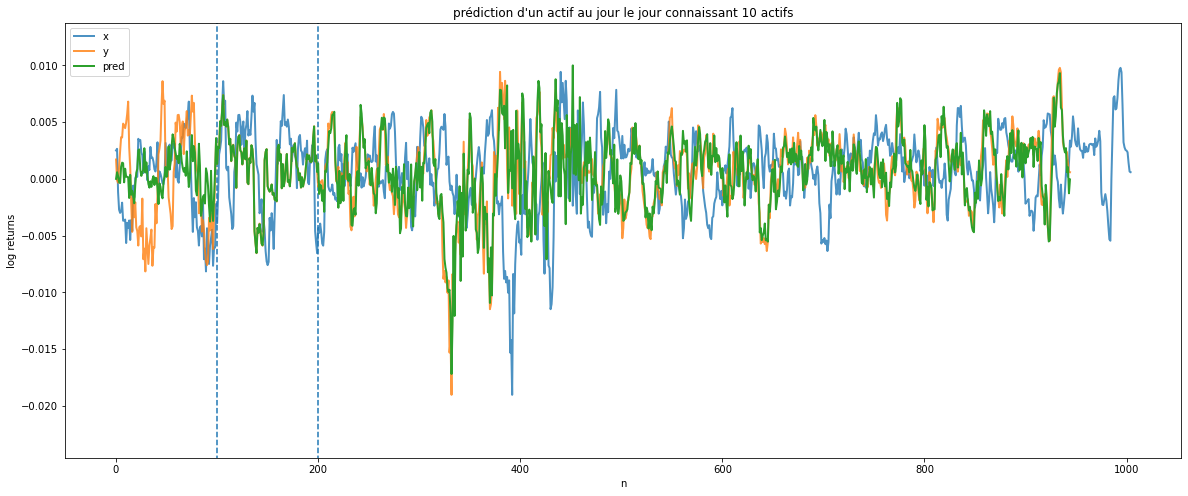

erreur RMSE :  0.0017958274011200175
erreur MASE :  1.0818124859237261


In [114]:
shift = 60
L = 10
data_l = moyenne_mobile(data, L)
data_ls = shift_array(data_l, shift)
nflush = 100
ntrain = 100

esn = ESN(N=4000, shift=shift, gamma=1e-7, r=1.015, mode='d', seed=0, sparse=0.1)
y_est = esn.fit_pred(data_l, data_ls, nflush=nflush, ntrain=ntrain)

super_plot(data_l, data_ls, y_est, nflush, ntrain, idx_to_plot=0)

print("erreur RMSE : ", RMSE(data_ls, y_est, nflush+ntrain, idx_error=0))
print("erreur MASE : ", MASE(data_ls, y_est, nflush+ntrain, idx_error=0))

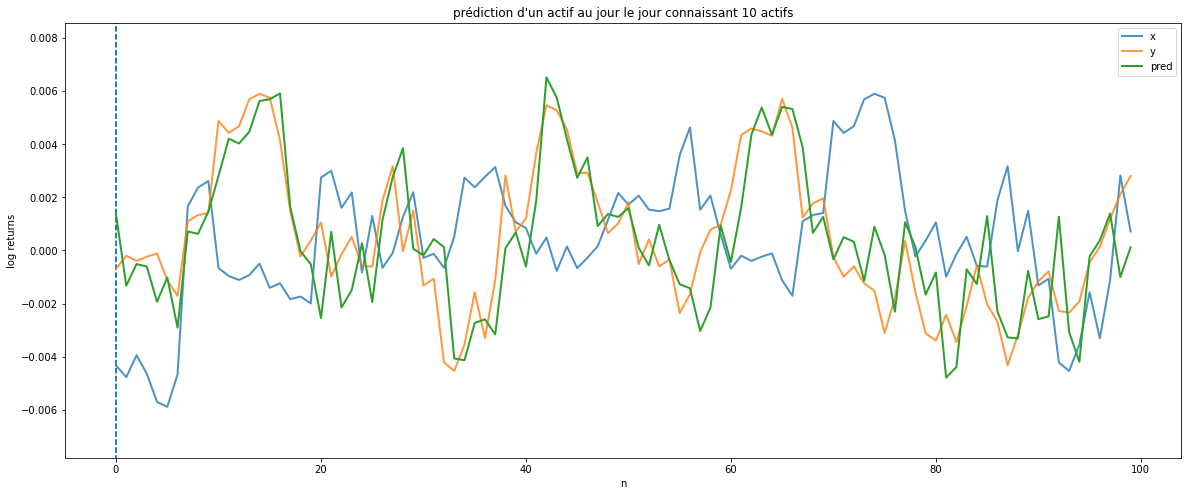

In [115]:
super_plot(data_l[:,200:300], data_ls[:,200:300], y_est[:,200:300], 0, 0, idx_to_plot=0)

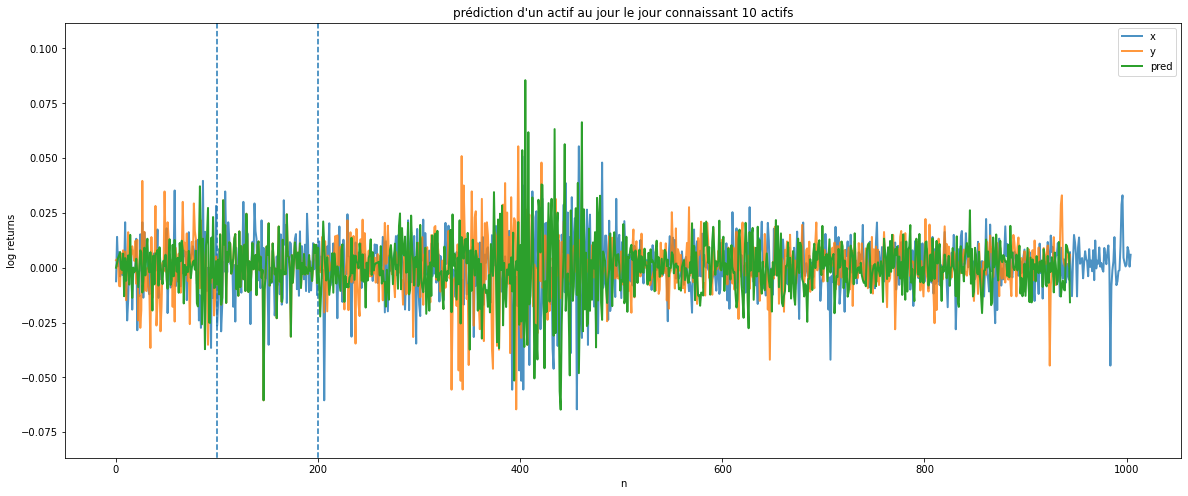

erreur RMSE :  0.017974355058107266
erreur MASE :  1.0206314098747145


In [116]:
shift = 60
L = 1
data_l = moyenne_mobile(data, L)
data_ls = shift_array(data_l, shift)
nflush = 100
ntrain = 100

esn = ESN(N=4000, shift=shift, gamma=1e-7, r=1.015, mode='d', seed=0, sparse=0.1)
y_est = esn.fit_pred(data_l, data_ls, nflush=nflush, ntrain=ntrain)

super_plot(data_l, data_ls, y_est, nflush, ntrain, idx_to_plot=0)

print("erreur RMSE : ", RMSE(data_ls, y_est, nflush+ntrain, idx_error=0))
print("erreur MASE : ", MASE(data_ls, y_est, nflush+ntrain, idx_error=0))

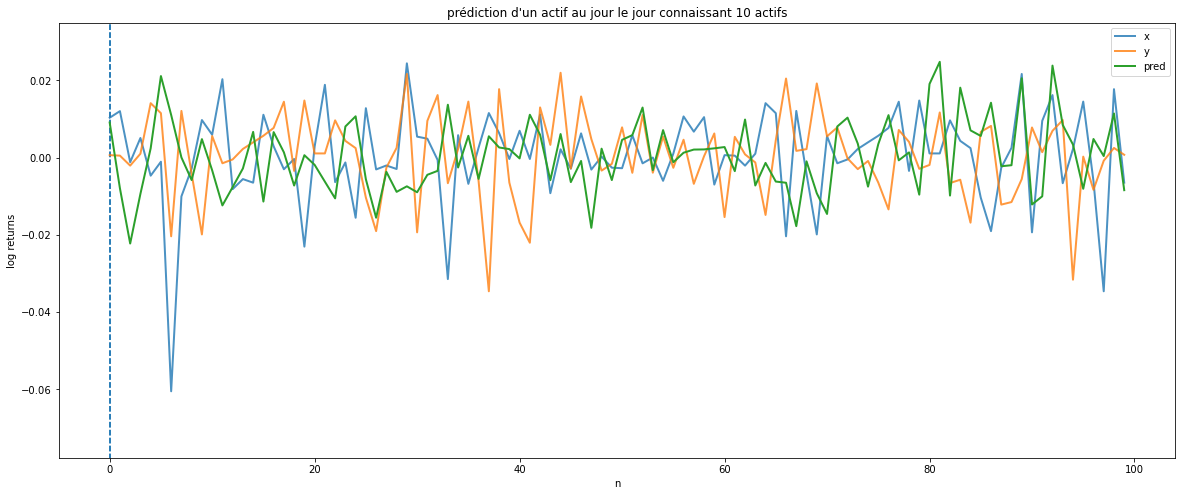

In [117]:
super_plot(data_l[:,200:300], data_ls[:,200:300], y_est[:,200:300], 0, 0, idx_to_plot=0)

### Tests de la matrice reservoir définie par bloc

In [39]:
data = np.array(HSI50[0:10])

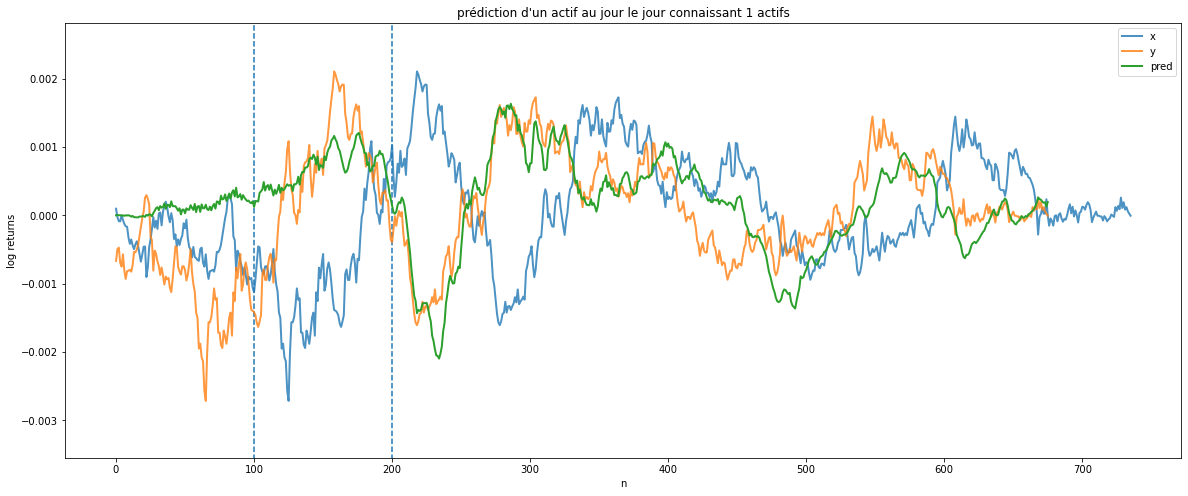

erreur RMSE :  0.0004440532043719422


In [335]:
shift = 60
L = 60
data_l = moyenne_mobile(data, L)
data_ls = shift_array(data_l, shift)
nflush = 100
ntrain = 100
r_tab = [0.98, 0.99, 1, 1.005, 1.02] #matrice réservoir par blocs

esn = ESN(N=50, shift=shift, gamma=1e-6, r=r_tab, mode='d', seed=0)
y_est = esn.fit_pred(data_l, data_ls, nflush=nflush, ntrain=ntrain)

super_plot(data_l, data_ls, y_est, nflush, ntrain, idx_to_plot=0)

print("erreur RMSE : ", RMSE(data_ls, y_est, nflush+ntrain, idx_error=0))

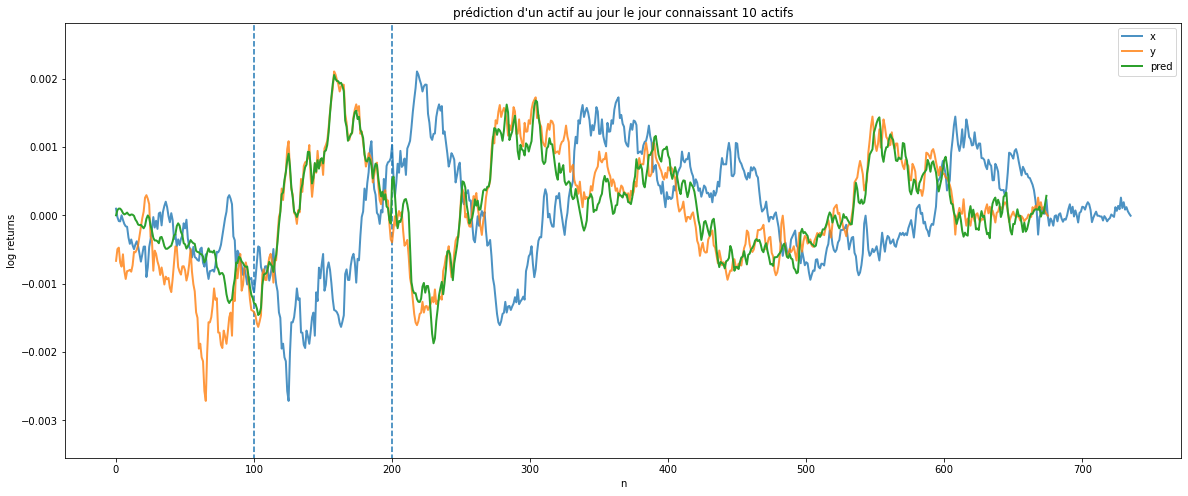

erreur RMSE :  0.00026797992633607263


In [43]:
shift = 60
L = 60
data_l = moyenne_mobile(data, L)
data_ls = shift_array(data_l, shift)
nflush = 100
ntrain = 100
r_tab = [1.01, 1.015]

esn = ESN(N=4000, shift=shift, gamma=1e-6, r=r_tab, mode='d', seed=0)
y_est = esn.fit_pred(data_l, data_ls, nflush=nflush, ntrain=ntrain)

super_plot(data_l, data_ls, y_est, nflush, idx_to_plot=0)

print("erreur RMSE : ", RMSE(data_ls, y_est, nflush+ntrain, idx_error=0))

In [8]:
class ESN:
    
    def __init__(self, N=1000, gamma=10e-2, r=1.01, shift=60, sigma=lambda t: np.tanh(t), seed=None, mode='s', sparse=None):
        self.N = N  # nombre de neuronnes 
        self.gamma = gamma  # paramètre de régularisation
        self.r = r  # rayon spectral de la matrice réservoir
        self.shift = shift  # shift temporel des données
        self.sigma = sigma  # fonction d'activation
        self.mode = mode  # choix du mode "s":stationnaire, "d":dynamique (fenêtre glissante)
        self.seed = seed  # seed du générateur aléatoire pour l'initialisation des matrices
        self.sparse = sparse  # coefficient de sparsité 
        
        
    def fit_pred(self, x, y, nflush=200, ntrain=200):
        if x.ndim == 2:
            self.D = len(x)
            self.n = len(x[0])
        elif x.ndim == 1:
            self.n = len(x)
            self.D = 1
        else:
            print("x n'est pas du bon format")
            return
        rng = np.random.default_rng(self.seed)
        w_in = rng.normal(0, 1, (self.D, self.N))
        self.w_in = w_in/np.linalg.norm(w_in)
        self.W_res =  block_reservoir(self.N, self.r, rng)
        if self.sparse is not None:
            sparse(self.W_res, self.sparse, rng)
        self.w_out = None
        if self.mode == 'd':
            return self.fit_pred_d_(x, y, nflush, ntrain)
        if self.mode =='s':
            return self.fit_pred_s_(x, y, nflush, ntrain)
            
   
            
    def fit_pred_s_(self, x, y, nflush, ntrain):
        # on crée Z recursivement
        self.Z = np.zeros((self.N, int(self.n - abs(self.shift))))
        for i in range(1, int(self.n - abs(self.shift))):
            self.Z[:,i]=self.sigma(x[:, i]@self.w_in + self.W_res@self.Z[:,i-1])
        # training 
        k = nflush + ntrain
        self.w_out=self.Z[:,nflush:k]@np.linalg.pinv(self.gamma*np.eye(ntrain) + 
                    np.transpose(self.Z[:,nflush:k])@self.Z[:,nflush:k])@np.transpose(y[:, nflush:k])
        return np.transpose(self.w_out)@self.Z

    
        
    def fit_pred_d_(self, x, y, nflush, ntrain):
        # on crée Z recursivement
        self.Z = np.zeros((self.N, int(self.n - abs(self.shift))))
        for i in range(1, int(self.n - abs(self.shift))):
            self.Z[:,i]=self.sigma(x[:, i]@self.w_in + self.W_res@self.Z[:,i-1])
        # training dynamique
        k = nflush + ntrain
        self.w_out=self.Z[:,nflush:k]@np.linalg.pinv(self.gamma*np.eye(ntrain) +
                    np.transpose(self.Z[:,nflush:k])@self.Z[:,nflush:k])@np.transpose(y[:, nflush:k])
        pred = np.array(list((np.transpose(self.w_out)@self.Z[:, 0:k])) )
        for i in range(nflush, self.n - ntrain - abs(self.shift)):
            self.w_out = self.Z[:,i:i+ntrain]@np.linalg.pinv(self.gamma*np.eye(ntrain) +
                        np.transpose(self.Z[:,i:i+ntrain])@self.Z[:,i:i+ntrain])@np.transpose(y[:, i:i+ntrain])
            pred = np.column_stack((pred, np.transpose(self.w_out)@self.Z[:, i+ntrain]))
        return pred
    
    
    

In [69]:
def super_plot(x, y, pred, nflush, ntrain, custom_title = None, idx_to_plot = None):
    plt.figure(figsize=(20,8))
    lw=2 if len(x) == 1 else 1
    if idx_to_plot is None:
        for i in range(len(x)):
            if len(data_l) == 1:
                plt.plot(x[i], label="x" if i ==0 else "", linewidth=lw, c='tab:blue', alpha = 0.8)
            plt.plot(y[i], label="y" if i ==0 else "", linewidth=lw, c='tab:orange', alpha = 0.8)
            plt.plot(pred[i], label="pred" if i ==0 else "",  linewidth=lw, c='tab:green')
        if len(x) > 1: plt.title("prédictions de {} actifs au jour le jour".format(len(x)))
        if len(x) == 1 : plt.title("prédiction de l'évolution d'un actif au jour le jour")
    if idx_to_plot is not None:
        # Cas ou l'on souhaite plot la prédiction d'un actif obtenu par régression multi actifs
            plt.plot(x[idx_to_plot], label="x", linewidth=2, c='tab:blue', alpha = 0.8)
            plt.plot(y[idx_to_plot], label="y", linewidth=2, c='tab:orange', alpha = 0.8)
            plt.plot(pred[idx_to_plot], label="pred",  linewidth=2, c='tab:green')
            plt.title("prédiction d'un actif au jour le jour connaissant {} actifs".format(len(x)))
    b, t = plt.ylim()
    plt.vlines(nflush, 2*b, 2*t, ls='dashed')
    plt.vlines(nflush+ntrain, 2*b, 2*t, ls='dashed')
    plt.ylim(top=1.2*t)
    plt.ylim(bottom=1.2*b)
    if custom_title is not None : plt.title(custom_title)
    plt.xlabel("n")
    plt.ylabel("log returns")
    plt.legend()
    plt.show()
    
    
def RMSE(y, pred, start, idx_error=None):
    error = []
    #on ignore le début dans le calcul de l'erreur (flush et phase de training pur)
    tmpy = y[:, start:]
    tmpred = pred[:, start:]
    if idx_error is None:
        for d in range(len(y)):
            tmp1 = [(i-j)**2 for i, j in zip(tmpy[d], tmpred[d])]
            error.append(np.sqrt(np.mean(tmp1)))
    if idx_error is not None:
        tmp1 = [(i-j)**2 for i, j in zip(tmpy[idx_error], tmpred[idx_error])]
        error.append(np.sqrt(np.mean(tmp1)))
    return np.mean(error)

def MASE(y, pred, start, idx_error=None):
    n = len(y_est[0][start:])
    error = []
    if idx_error is None:
        for d in range(len(y)):
            denom = np.abs(np.diff(y[d][start:]) ).sum()/(n-1)
            errors = np.abs(y[d][start:] - pred[d][start:] )
            error.append(errors.mean()/denom)
    if idx_error is not None:
        denom = np.abs(np.diff(y[idx_error][start:]) ).sum()/(n-1)
        errors = np.abs(y[idx_error][start:] - pred[idx_error][start:] )
        error.append(errors.mean()/denom) 
    return np.mean(error)

def MAPE(y, pred, start, idx_error=None):
    error = []
    #on ignore le début dans le calcul de l'erreur (flush et phase de training pur)
    tmpy = y[:, start:]
    tmpred = pred[:, start:]
    if idx_error is None:
        for d in range(len(y)):
            tmp1 = [abs((i-j)/i) for i, j in zip(tmpy[d], tmpred[d])]
            error.append(np.sqrt(np.mean(tmp1)))
    if idx_error is not None:
        tmp1 = [abs((i-j)/i) for i, j in zip(tmpy[idx_error], tmpred[idx_error])]
        error.append(np.sqrt(np.mean(tmp1)))
    return np.mean(error)


def block_reservoir(N, r_tab, rng):
    """
    Crée la matrice réservoir par blocks diagonaux ayant chacun le rayon spectral
    défini dans r_tab. Si r_tab est un scalaire ou un tableau de taille 1 la 
    matrice reservoir est définie avec un bloc de taille N*N
    """
    if not isinstance(r_tab, list):
        r_tab = [r_tab]
    nblocks = len(r_tab)
    size = int(N/nblocks)
    W_res_blocks = []
    for b in range(nblocks):
        block = rng.normal(0, 1, (size, size))
        egv = np.linalg.eigvals(block)
        rs = np.max(np.abs(egv))
        W_res_blocks.append(r_tab[b]*block/rs)
    return block_diag(*W_res_blocks)


def sparse(W_res, eps, rng):
    """
    Permet d'initialiser des coefficients de la matrice reservoir à 0 selon un
    masque aléatoire et un coefficient de sparsité passé en argument
    """
    mask = rng.uniform(size=np.shape(W_res))
    for i in range(len(W_res)):
        for j in range(len(W_res)):
            if abs(mask[i][j]) < eps:
                W_res[i][j] = 0

                
def moyenne_mobile(x, L):
    """
    Moyenne mobile effectuant un lissage de longueur N sur les données x
    """
    res = []
    a = [1/L if i < L else 0 for i in range(len(x[0]))]
    b = [0]*len(x[0])
    b[0] = 1/L
    T = toeplitz(b, a)
    for d in range(len(x)):
        res.append(T@x[d])
    return np.array(res)


def shift_array(xs, n):
    """
    Retourne les données d'entrée décalées dans le temps
    """
    res = []
    for d in range(len(xs)):
        res.append([xs[d][i+n] for i in range(len(xs[0]) - abs(n))])
    return np.array(res)

